In [1]:
# import MINST dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


4


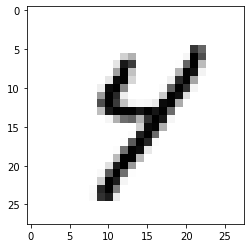

In [2]:
import matplotlib.pyplot as plt

# create plots in same page
%matplotlib inline 

#  select a random number to display
# we can select anything up to 60,000 as the trainig data has 60,000 images
image_index = 7077 

print(y_train[image_index]) 

plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Introduce noise to the training and testing data. The chosen noise factor is 0.2.

In [4]:
import numpy as np

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

X_train_noisy = np.clip(x_train_noisy, 0. , 1.)
X_test_noisy = np.clip(x_test_noisy, 0. , 1.)

In [5]:
# Normalize the training and testing dataset 
x_train_noisy = tf.keras.utils.normalize(x_train_noisy, axis=1)
X_test_noisy = tf.keras.utils.normalize(X_test_noisy, axis=1)

In [6]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2686 - accuracy: 0.9192
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1142 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0789 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0581 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0443 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0360 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0301 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0282 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0226 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 32s 17m

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2686 - accuracy: 0.9192

Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1142 - accuracy: 0.9654

Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0789 - accuracy: 0.9757

Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0581 - accuracy: 0.9815

Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0443 - accuracy: 0.9855

Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0360 - accuracy: 0.9876

Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0301 - accuracy: 0.9894

Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0282 - accuracy: 0.9902

Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0226 - accuracy: 0.9921

Epoch 10/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0226 - accuracy: 0.9923
<tensorflow.python.keras.callbacks.History at 0x7f6c3077ad30>

Evaluate the model accuracy

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 3720.9731 - accuracy: 0.5851


[3720.97314453125, 0.585099995136261]

loss: 3720.9731 - accuracy: 0.5851